In [1]:
# -- import packages 
import pandas as pd 
import requests
import io
from datetime import date

In [2]:
# -- make sure messychart in path
# ------ messychart is a library for creating messari charts (reach out to dustin for a copy)
import sys
sys.path.append("/Users/dustin/Documents/GitHub/ponzu/notebooks/temporary/") # -- edit to be the folder of where you save the file 

from messycharts import messychart 

In [3]:
# -- load data set 
url = "https://messari-reports.dustinteander.repl.co/dataset/layer-1/chain_data"
csv = requests.get(url).content
chain_df = pd.read_csv(io.StringIO(csv.decode('utf-8')))

Note - everything above is just copy paste and can be given to anyone. everything below is playing with df to do analysis

In [4]:
# -- see what's in the dataframe 
chain_df

,date,chain,tvl,mcap,active_addrs,txns,twitter,stable_supply
0,2021-01-01,Ethereum,1.745434e+10,8.403769e+10,441169.0,1126605.0,548211.0,1.959873e+10
1,2021-01-02,Ethereum,1.748414e+10,8.329408e+10,420530.0,1159038.0,550791.0,1.989801e+10
2,2021-01-03,Ethereum,1.786076e+10,8.859535e+10,488930.0,1220944.0,553813.0,2.000850e+10
3,2021-01-04,Ethereum,1.964954e+10,1.125254e+11,511899.0,1260300.0,556815.0,2.021060e+10
4,2021-01-05,Ethereum,2.052667e+10,1.166932e+11,504191.0,1244603.0,562561.0,2.012580e+10
...,...,...,...,...,...,...,...,...
6405,2022-09-29,Cosmos,1.459845e+09,6.257462e+09,41047.0,164692.0,469853.0,NaN
6406,2022-09-30,Cosmos,1.460903e+09,6.071959e+09,39068.0,154596.0,470129.0,NaN
6407,2022-10-01,Cosmos,1.463993e+09,6.057635e+09,34239.0,133972.0,470268.0,NaN
6408,2022-10-02,Cosmos,1.460954e+09,5.959704e+09,34000.0,148818.0,470740.0,NaN


Dataframe (chain_df) is constructed as a raw data set meaning you'll have to manipulate it to be a timeseries (its more versitile to you this way but takes more skill)

There is TVL, Market Cap, Active Addresses, Daily Txns, Twitter Followers, and Stable Supply for the following chains 

In [6]:
# -- check which chains are included 
chain_df.chain.unique()

array(['Ethereum', 'Solana', 'Avalanche', 'Polygon', 'Arbitrum',
       'Optimism', 'Fantom', 'Near', 'BSC', 'Cosmos'], dtype=object)

In [9]:
# -- organize the df to plot a single chain and a single value 

chain = 'Ethereum'
metric = 'tvl' # -- must match the column header case and spelling 

plot_df = chain_df[chain_df.chain == chain].groupby(['date'])[metric].sum().to_frame()

# == code explainer 
# ------- chain_df[chain_df.chain == chain] : filters the dataframe by the column 'chain' where it equals '==' the variable 'chain' set above
# ------- .groupby(['date'])[metric].sum()  : two part function 1) groupby(['date']) says combine the df on the 'date' column 
#                                                               2) [metric].sum() tells the groupby statement "how" to condense.
#                                                                  In this case, sum all values of the 'metric' (variable) column [you can do .mean() if you want avg]

plot_df

,tvl
date,
2021-01-01,1.745434e+10
2021-01-02,1.748414e+10
2021-01-03,1.786076e+10
2021-01-04,1.964954e+10
2021-01-05,2.052667e+10
...,...
2022-09-29,4.831948e+10
2022-09-30,4.826375e+10
2022-10-01,4.810006e+10


<AxesSubplot:xlabel='date'>

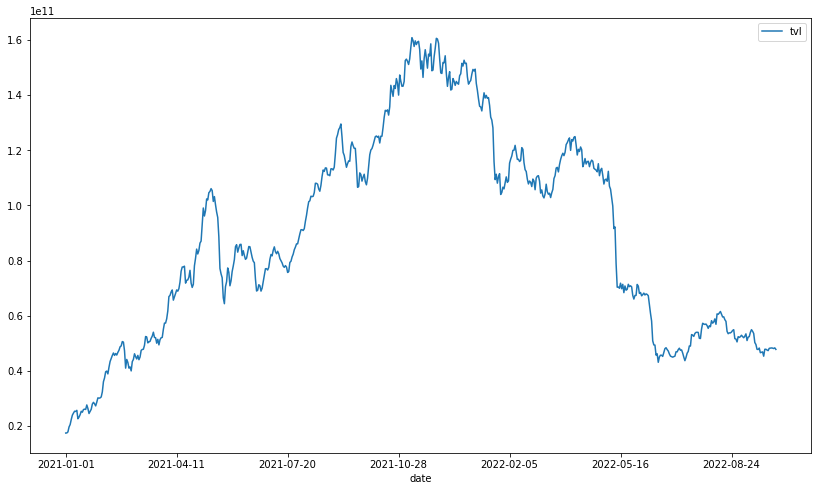

In [10]:
plot_df.plot(figsize = (14,8))

In [13]:
# -- plot multiple chains for a single variable 
chains = list(chain_df.chain.unique()) # -- creates a list of all of the valid chains (easier to remove chains if you wish)
metric = 'tvl' # -- must match the column header case and spelling 

plot_df = chain_df[chain_df.chain.isin(chains)].groupby(['date', 'chain'])[metric].sum().unstack()
# -- chain_df[chain_df.chain.isin(chains)] filters the dataframe by saying only look at the rows where the value of the chain column is in this list 'chains'
# -- adding 'chain' to the groupby will add tvl column for each chain on each date
# -- adding the '.unstack()' will move the chain column to be multiple rows (remove this and the sort code to see what I mean)

# -- sort df with the largest value first (you can copy and paste this at will - only things to change are the "-1" can be "-30" if want to sort by 30d sum
new_cols = list(plot_df.iloc[(-1)::].sum().sort_values(ascending = False).index)
plot_df = plot_df[new_cols]

plot_df


chain,Ethereum,BSC,Solana,Avalanche,Polygon,Cosmos,Optimism,Arbitrum,Fantom,Near
date,,,,,,,,,,
2021-01-01,1.745434e+10,1.519984e+08,0.000000e+00,0.000000e+00,3.247274e+05,9.249044e+07,0.000000e+00,1.204762e+07,0.000000e+00,0.000000e+00
2021-01-02,1.748414e+10,1.708966e+08,0.000000e+00,0.000000e+00,3.135262e+05,9.361601e+07,0.000000e+00,1.218382e+07,0.000000e+00,0.000000e+00
2021-01-03,1.786076e+10,1.619157e+08,0.000000e+00,0.000000e+00,3.194089e+05,9.322707e+07,0.000000e+00,1.222715e+07,0.000000e+00,0.000000e+00
2021-01-04,1.964954e+10,1.874533e+08,0.000000e+00,0.000000e+00,3.050798e+05,9.696474e+07,0.000000e+00,1.345183e+07,0.000000e+00,0.000000e+00
2021-01-05,2.052667e+10,2.049293e+08,0.000000e+00,0.000000e+00,3.113200e+05,9.115209e+07,0.000000e+00,1.222600e+07,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2022-09-29,4.831948e+10,6.586564e+09,2.037738e+09,1.951308e+09,1.457257e+09,1.459845e+09,1.009329e+09,1.020930e+09,6.138129e+08,3.323164e+08
2022-09-30,4.826375e+10,6.616925e+09,2.061998e+09,1.938093e+09,1.465109e+09,1.460903e+09,1.021930e+09,1.014355e+09,6.196610e+08,3.326432e+08
2022-10-01,4.810006e+10,6.593371e+09,2.027126e+09,1.925159e+09,1.486298e+09,1.463993e+09,1.018905e+09,1.008458e+09,6.046678e+08,3.369487e+08


<AxesSubplot:xlabel='date'>

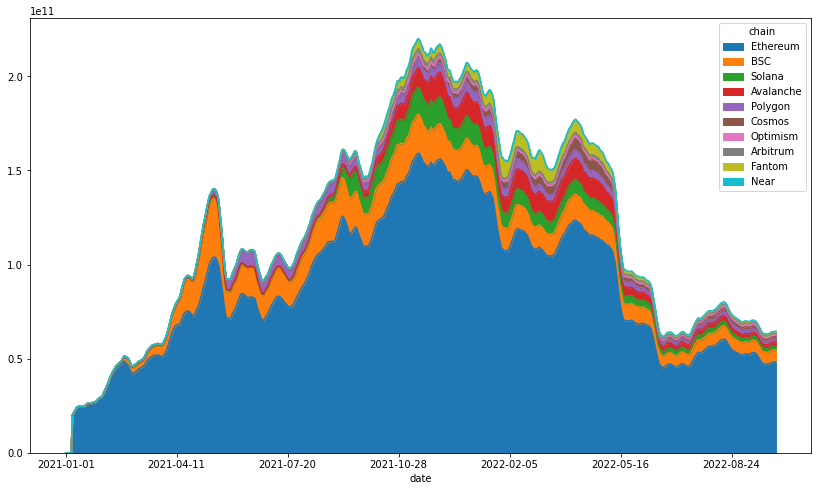

In [16]:
# -- plot 7d moving avg
plot_df.rolling(7).mean().plot(figsize = (14,8), kind = 'area') 

<AxesSubplot:xlabel='chain'>

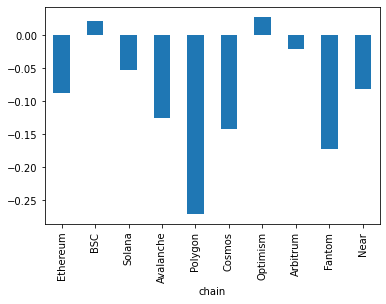

In [17]:
# -- make percent change over 30d period
plot_df.pct_change(30).iloc[-1].plot(kind='bar')